In [2]:
import matplotlib.pyplot as plt
import numpy as np


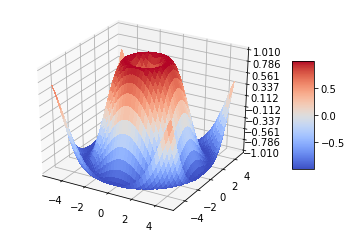

In [3]:
### Colormap example
#%matplotlib notebook
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [4]:
# I will start out with 2D colormaps

In [5]:
#This function returns final positions of masses after a set number of iterations
# This has been tested and works just fine
def SimFunc(coord0, coord1, coord2, iterations=100, dt=1, m0=1, m1=1, m2=1):
    x0i, y0i = coord0[0], coord0[1]
    x1i, y1i = coord1[0], coord1[1]
    x2i, y2i = coord2[0], coord2[1]
    
    vel0, vel1, vel2 = [0, 0], [0, 0], [0, 0]
    
    xPast = [[x0i], [x1i], [x2i]]
    yPast = [[y0i], [y1i], [y2i]]

    loc0, loc1, loc2 = [x0i, y0i], [x1i, y1i], [x2i, y2i]
    newloc0, newloc1, newloc2 = [x0i, y0i], [x1i, y1i], [x2i, y2i]


    for i in range(iterations):

        d01 = distEq(loc0, loc1)
        d02 = distEq(loc0, loc2)

        d12 = distEq(loc1, loc2)
        d10 = d01

        d20 = d02
        d21 = d12

        a0x = ((m1/(d01**3))*(loc1[0] - loc0[0]) + (m2/(d02**3))*(loc2[0] - loc0[0]))
        a0y = ((m1/(d01**3))*(loc1[1] - loc0[1]) + (m2/(d02**3))*(loc2[1] - loc0[1]))


        a1x = ((m2/(d12**3))*(loc2[0] - loc1[0]) + (m0/(d10**3))*(loc0[0] - loc1[0]))
        a1y = ((m2/(d12**3))*(loc2[1] - loc1[1]) + (m0/(d10**3))*(loc0[1] - loc1[1]))


        a2x = ((m0/(d20**3))*(loc0[0] - loc2[0]) + (m1/(d21**3))*(loc1[0] - loc2[0]))
        a2y = ((m0/(d20**3))*(loc0[1] - loc2[1]) + (m1/(d21**3))*(loc1[1] - loc2[1]))



        vel0[0] += a0x*dt
        vel0[1] += a0y*dt

        vel1[0] += a1x*dt
        vel1[1] += a1y*dt

        vel2[0] += a2x*dt
        vel2[1] += a2y*dt


        newloc0[0] = loc0[0] + vel0[0]*dt
        newloc0[1] = loc0[1] + vel0[1]*dt

        newloc1[0] = loc1[0] + vel1[0]*dt
        newloc1[1] = loc1[1] + vel1[1]*dt

        newloc2[0] = loc2[0] + vel2[0]*dt
        newloc2[1] = loc2[1] + vel2[1]*dt

        loc0, loc1, loc2 = newloc0, newloc1, newloc2
        xPast[0].append(loc0[0])
        xPast[1].append(loc1[0])
        xPast[2].append(loc2[0])

        yPast[0].append(loc0[1])
        yPast[1].append(loc1[1])
        yPast[2].append(loc2[1])
        
    fin0 = [xPast[0][-1:][0], yPast[0][-1:][0]]
    fin1 = [xPast[1][-1:][0], yPast[1][-1:][0]]
    fin2 = [xPast[2][-1:][0], yPast[2][-1:][0]]

        
    return fin0, fin1, fin2

In [6]:
def distEq(coord0, coord1):
    return np.sqrt((coord0[0] - coord1[0])**2 + ((coord0[1] - coord1[1])**2))

In [7]:
#Write function that spits out metric l_ave/l_02
def norm_ave_metric_angular(theta, phi, l_02=10, iterations=2000, dt=1, m0=1, m1=1, m2=1):
    l_01 = l_02*np.sin(phi)/(np.sin(np.pi - theta - phi))
    x1 = l_01*np.cos(theta)
    y1 = l_01*np.sin(theta)
    
    coord0 = [0, 0]
    coord1 = [x1, y1]
    coord2 = [l_02, 0]
    
    #The following has been tested and should work okay
    fin0, fin1, fin2 = SimFunc(coord0, coord1, coord2, iterations, dt, m0, m1, m2)
    
    dist01 = distEq(fin0, fin1)
    #print(dist01)
    dist02 = distEq(fin0, fin2)
    #print(dist02)
    dist12 = distEq(fin1, fin2)
    #print(dist12)
    
    raw_ave = (dist01 + dist02 + dist12)/3
    norm_ave = raw_ave/l_02
    
    #return norm_ave
    return raw_ave

In [8]:
#We then choose our two parameters to be initial x and y for m1
def norm_ave_metric(x1, y1, l_02=10, iterations=100, dt=1, m0=1, m1=1, m2=1):
    
    coord0 = [0, 0]
    coord1 = [x1, y1]
    coord2 = [l_02, 0]
    
    #The following has been tested and should work okay
    fin0, fin1, fin2 = SimFunc(coord0, coord1, coord2, iterations, dt, m0, m1, m2)
    
    dist01 = distEq(fin0, fin1)
    #print(dist01)
    dist02 = distEq(fin0, fin2)
    #print(dist02)
    dist12 = distEq(fin1, fin2)
    #print(dist12)
    
    raw_ave = (dist01 + dist02 + dist12)/3
    norm_ave = raw_ave/l_02
    
    return norm_ave
    #return raw_ave

In [9]:
#thetas = np.linspace(0.1, (np.pi/2) - .1, 100)
#phis = np.linspace(0.1, (np.pi/2) - .1, 100)
#l_02 = 10

In [10]:
#Thet, Phi = np.meshgrid(thetas, phis)

In [11]:
#metric = norm_ave_metric(Thet, Phi, l_02, iterations=100)

In [262]:
l_02 = 15
iterations = 500
dt = 1
m0, m1, m2 = 1, 1, 1
xes = np.linspace(0, 2*l_02, 301)
yes = np.linspace(0, 2*l_02, 301)

In [263]:
#yes

In [264]:
X1, Y1 = np.meshgrid(xes, yes)

In [265]:
metric = norm_ave_metric(X1, Y1, l_02, iterations, dt, m0, m1, m2)

/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
/Users/brocktonstover/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero enc

In [266]:
#metric

In [267]:
#%matplotlib notebook
#plot = plt.pcolormesh(thetas, phis, metric, shading='auto')
#plt.xlabel("theta")
#plt.ylabel("phi")
#plt.xlim(1.2, 1.4)
#plt.ylim(.8, 1)
#plt.colorbar(plot)

#plt.clim(0, 1000)


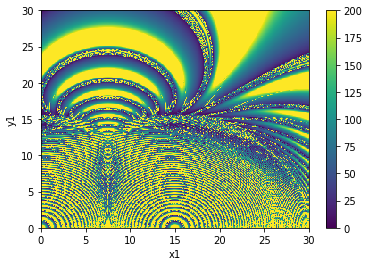

In [271]:
#%matplotlib notebook
plot = plt.pcolormesh(X1, Y1, metric, cmap='viridis', shading='auto')
plt.xlabel("x1")
plt.ylabel("y1")
#plt.xlim(1.2, 1.4)
#plt.ylim(.8, 1)
plt.colorbar(plot)

plt.clim(0, 200)
#plt.plot(8.484848484848484, 0.7070707070707071, 'ro')
#plt.savefig("PhaseSpaceEx.png")


In [173]:
# Find initial coordinates for m1 under threshold
threshold = .6
xInd = 0
yInd = 0
for each in metric:
    
    xInd = 0
    for ind in each:
        
        if (ind <= threshold):
            thisX = xes[xInd]
            thisY = yes[yInd]
            print(thisX, thisY)
        xInd += 1
    yInd += 1

6.135 5.7
8.865 5.7


In [78]:
#np.array??

In [84]:
threshold = 30
thetInd = 0
phiInd = 0
for each in metric:
    phiInd += 1
    thetInd = 0
    for ind in each:
        thetInd += 1
        if (ind <= 30):
            thisThet = thetas[thetInd]
            thisPhi = phis[phiInd]
            
            l02 = 10
            l01 = l02*np.sin(thisPhi)/(np.sin(np.pi - thisThet - thisPhi))
            x1 = l01*np.cos(thisThet)
            y1 = l01*np.sin(thisPhi)
            print(x1, y1)

2.8775650007267783 0.38450551960447293
0.6828831201478901 0.3377761005113835
2.6046763397341617 0.585700047049013
1.5265469340987283 0.549131533801851
1.5855420054123885 0.8688022148801653
7.122434999273218 2.174836259639398
0.8373132995767365 0.9176181385134105
0.9428778908474853 1.5714087324653494
2.6038423004277504 2.317064597944664
1.724032126517027 2.333850854535474
7.395323660265841 3.716818099519666
4.136796238280512 2.9164412742099524
5.863203761719489 4.570377629789021
4.860900551448518 4.399169959012406
5.139099448551483 4.676063115419645
1.8438056182975107 7.065617649857874
8.473453065901271 6.825196090760352
7.3961576995722496 7.097899586885193
8.414457994587611 7.462755932842359
9.31711687985211 8.810289410541511
8.275967873482973 8.823078864624552
3.5394735691829435 16.99837417739759
9.162686700423263 9.239799402988222
9.057122109152512 9.573900606504157
8.156194381702491 12.087818802413095
6.46052643081706 18.51559905502803


In [71]:
len(metric)

100

In [118]:
fin0, fin1, fin2 = SimFunc([0, 0], [5.940404040404041, 5.346464646464646], [10, 0], iterations=100, dt=1, m0=1, m1=1, m2=1)

In [119]:
dist01 = distEq(fin0, fin1)
#print(dist01)
dist02 = distEq(fin0, fin2)
#print(dist02)
dist12 = distEq(fin1, fin2)
#print(dist12)

raw_ave = (dist01 + dist02 + dist12)/3
norm_ave = raw_ave/l_02

In [120]:
raw_ave

939.4497208843019

In [197]:
norm_ave_metric(9, 1, l_02, iterations=100)

829.5033409739145

In [177]:
norm_ave_metric(4, 5, l_02, iterations=100)

693.6120754470631

In [181]:
xex = [3, 4]
yex = [4, 5]

XEX, YEX = np.meshgrid(xex, yex)
norm_ave_metric(XEX, YEX, l_02, iterations=100)

array([[246.31325551, 464.59778006],
       [224.01790265, 693.61207545]])